In [1]:
import os
from operator import itemgetter    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
#from sklearn.preprocessing import Imputer
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder, LabelBinarizer
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
#from sklearn.cross_validation import KFold, cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
#from sklearn.utils.fixes import signature
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from mlxtend.plotting import plot_learning_curves
from mlxtend.preprocessing import shuffle_arrays_unison

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.utils import to_categorical


Using TensorFlow backend.


In [2]:
#2 Importing the patients dataset by pandas
data = pd.read_csv('patient_data.csv')
#X = dataset.iloc[:,].values

In [3]:
data.shape

(2346760, 37)

In [4]:
#data = rep_sample(data, 'Length of Stay', 50000)
data= data.groupby('Length of Stay',as_index = False,group_keys=False).apply(lambda s: s.sample(300,replace=True))

In [5]:
data.shape

(65700, 37)

In [6]:
data = data[data['Length of Stay']!='120 +']

In [7]:
data.shape

(65400, 37)

In [8]:
data.to_csv("processed_data.csv")

In [9]:
print(data.shape)
data.info()
data.describe()

(65400, 37)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 65400 entries, 1051989 to 881652
Data columns (total 37 columns):
Health Service Area                    65364 non-null object
Hospital County                        65364 non-null object
Operating Certificate Number           65364 non-null float64
Facility Id                            65364 non-null float64
Facility Name                          65400 non-null object
Age Group                              65400 non-null object
Zip Code - 3 digits                    65349 non-null object
Gender                                 65400 non-null object
Race                                   65400 non-null object
Ethnicity                              65400 non-null object
Length of Stay                         65400 non-null object
Type of Admission                      65400 non-null object
Patient Disposition                    65400 non-null object
Discharge Year                         65400 non-null int64
CCS Diagnosis Cod

,Operating Certificate Number,Facility Id,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight
count,6.536400e+04,65364.000000,65400.0,65400.000000,65400.000000,65400.00000,65400.000000,65400.000000,6.536400e+04,5.642400e+04,5.198000e+03,65400.000000
mean,5.182871e+06,1040.552751,2015.0,225.971284,126.067309,459.12919,12.531942,3.119113,5.449806e+06,5.895730e+06,2.164380e+07,434.646789
std,2.042932e+06,621.906741,0.0,226.798966,88.485922,307.80685,6.851447,0.959095,2.064606e+07,2.141332e+07,3.768011e+07,1653.340504
min,1.010000e+05,1.000000,2015.0,1.000000,0.000000,1.00000,0.000000,0.000000,2.463000e+03,2.493000e+03,1.134800e+04,0.000000
25%,2.951001e+06,527.000000,2015.0,55.000000,41.000000,161.00000,6.000000,2.000000,1.927420e+05,1.881080e+05,1.755980e+05,0.000000
50%,5.957000e+06,1133.000000,2015.0,151.000000,142.000000,588.00000,15.000000,3.000000,2.303440e+05,2.248030e+05,2.267950e+05,0.000000
75%,7.002021e+06,1456.000000,2015.0,238.000000,216.000000,750.00000,18.000000,4.000000,2.587030e+05,2.550990e+05,2.808540e+05,0.000000
max,7.004010e+06,9431.000000,2015.0,917.000000,999.000000,956.00000,25.000000,4.000000,9.089153e+07,9.100000e+07,9.047586e+07,9900.000000


In [10]:
new_data = data[['Health Service Area','Age Group', 'Gender',
       'Type of Admission', 'Patient Disposition','CCS Diagnosis Code',
       'APR MDC Description','APR Severity of Illness Description',
       'APR Risk of Mortality','APR Medical Surgical Description',
       'Emergency Department Indicator','Length of Stay']]

In [11]:
new_data.columns = ['Area','Age_Group', 'Gender',
       'Type_Admission', 'Patient_Disposition','Diagnosis_Code',
       'DRG_Group','Severity_Illness',
       'Risk_Mortality','Medical_Surgical',
       'Emergency_Indicator','LOS' ]

In [12]:
new_data.head()

,Area,Age_Group,Gender,Type_Admission,Patient_Disposition,Diagnosis_Code,DRG_Group,Severity_Illness,Risk_Mortality,Medical_Surgical,Emergency_Indicator,LOS
1051989,New York City,70 or Older,M,Emergency,Home or Self Care,127,Diseases and Disorders of the Respiratory System,Moderate,Moderate,Medical,Y,1
1064938,New York City,70 or Older,F,Emergency,Home or Self Care,102,Diseases and Disorders of the Circulatory System,Moderate,Minor,Medical,Y,1
274565,Finger Lakes,30 to 49,F,Elective,Home or Self Care,205,Diseases and Disorders of the Musculoskeletal ...,Minor,Minor,Surgical,N,1
293982,Finger Lakes,50 to 69,F,Emergency,Home or Self Care,152,Diseases and Disorders of the Hepatobiliary Sy...,Moderate,Minor,Medical,Y,1
272016,Finger Lakes,30 to 49,F,Elective,Home or Self Care,46,Diseases and Disorders of the Female Reproduct...,Minor,Minor,Surgical,N,1


In [13]:
new_data.shape

(65400, 12)

In [14]:
def Diagnosis(Diagnosis_Code):
    if Diagnosis_Code in range(0,140):
        return 'INFECTIOUS_AND_PARASITIC_DISEASES'
    elif Diagnosis_Code in range(140,240):
        return 'NEOPLASMS'
    elif Diagnosis_Code in range(240,280):
        return 'ENDOCRINE_NUTRITIONAL_AND_METABOLIC_DISEASES_AND_IMMUNITY_DISORDERS'
    elif Diagnosis_Code in range(280, 290):
        return 'DISEASES_OF_THE_BLOOD_AND_BLOOD_FORMING_ORGANS'
    elif Diagnosis_Code in range(290,320):
        return 'MENTAL_BEHAVIORAL_AND_NEURODEVELOPMENTAL_DISORDERS'
    elif Diagnosis_Code in range(320,390):
        return 'DISEASES_OF_THE_NERVOUS_SYSTEM_AND_SENSE_ORGANS'
    elif Diagnosis_Code in range(390,460):
        return 'DISEASES_OF_THE_CIRCULATORY_SYSTEM'
    elif Diagnosis_Code in range(460,520):
        return 'DISEASES_OF_THE_RESPIRATORY_SYSTEM'
    elif Diagnosis_Code in range(520,580):
        return 'DISEASES_OF_THE_DIGESTIVE_SYSTEM'
    elif Diagnosis_Code in range(580,630):
        return 'DISEASES_OF_THE_GENITOURINARY_SYSTEM'
    elif Diagnosis_Code in range(630,680):
        return 'COMPLICATIONS_OF_PREGNANCY_CHILDBIRTH_AND_THE_PUERPERIUM'
    elif Diagnosis_Code in range(680,710):
        return 'DISEASES_OF_THE_SKIN_AND_SUBCUTANEOUS_TISSUE'
    elif Diagnosis_Code in range(710, 740):
        return 'DISEASES_OF_THE_MUSCULOSKELETAL_SYSTEM_AND_CONNECTIVE_TISSUE'
    elif Diagnosis_Code in range(740,760):
        return 'CONGENITAL_ANOMALIES'
    elif Diagnosis_Code in range(760,780):
        return 'CERTAIN_CONDITIONS_ORIGINATING_IN_THE_PERINATAL_PERIOD'
    elif Diagnosis_Code in range(780, 800):
        return 'SYMPTOMS_SIGNS_AND_ILL_DEFINED_CONDITIONS'
    elif Diagnosis_Code in range(800,1000):
        return 'INJURY_AND_POISONING'
    else:
        return 'OTHER'

In [15]:
new_data['Diagnosis_Group'] = new_data.Diagnosis_Code.apply(Diagnosis)

In [16]:
#!pip install catboost --trusted-host pypi.org --trusted-host files.pythonhosted.org --user

In [17]:
new_data.dtypes

Area                   object
Age_Group              object
Gender                 object
Type_Admission         object
Patient_Disposition    object
Diagnosis_Code          int64
DRG_Group              object
Severity_Illness       object
Risk_Mortality         object
Medical_Surgical       object
Emergency_Indicator    object
LOS                    object
Diagnosis_Group        object
dtype: object

In [18]:
#'120 +'
#new_data = new_data.replace([np.inf, -np.inf , np.nan], 0)

In [19]:
new_data["LOS"] = new_data["LOS"].astype(int)

In [20]:
new_data.dtypes

Area                   object
Age_Group              object
Gender                 object
Type_Admission         object
Patient_Disposition    object
Diagnosis_Code          int64
DRG_Group              object
Severity_Illness       object
Risk_Mortality         object
Medical_Surgical       object
Emergency_Indicator    object
LOS                     int32
Diagnosis_Group        object
dtype: object

In [21]:
def Length_stay(LOS):
    if LOS in range(0,3):
        return 'Very_Short_Term'
    elif LOS in range(3,10):
        return 'Short_Term'
    elif LOS in range(10,30):
        return 'Medium_Term'
    elif LOS in range(30,60):
        return 'Long_Term'
    elif LOS in range(60,121):
        return 'Very_Long_Term'
    else:
        return 'OTHER'

In [22]:
new_data['LOS_Group'] = new_data.LOS.apply(Length_stay)

In [23]:
new_data.columns

Index(['Area', 'Age_Group', 'Gender', 'Type_Admission', 'Patient_Disposition',
       'Diagnosis_Code', 'DRG_Group', 'Severity_Illness', 'Risk_Mortality',
       'Medical_Surgical', 'Emergency_Indicator', 'LOS', 'Diagnosis_Group',
       'LOS_Group'],
      dtype='object')

In [24]:
train_data = pd.get_dummies(new_data[['Area', 'Age_Group', 'Gender', 'Type_Admission', 'Patient_Disposition', 'DRG_Group', 'Severity_Illness', 'Risk_Mortality',
       'Medical_Surgical', 'Emergency_Indicator','Diagnosis_Group']])

In [25]:
train_data["LOS_Group"] = new_data['LOS_Group']

In [26]:
train_data.head()

,Area_Capital/Adiron,Area_Central NY,Area_Finger Lakes,Area_Hudson Valley,Area_Long Island,Area_New York City,Area_Southern Tier,Area_Western NY,Age_Group_0 to 17,Age_Group_18 to 29,...,Medical_Surgical_Not Applicable,Medical_Surgical_Surgical,Emergency_Indicator_N,Emergency_Indicator_Y,Diagnosis_Group_COMPLICATIONS_OF_PREGNANCY_CHILDBIRTH_AND_THE_PUERPERIUM,Diagnosis_Group_ENDOCRINE_NUTRITIONAL_AND_METABOLIC_DISEASES_AND_IMMUNITY_DISORDERS,Diagnosis_Group_INFECTIOUS_AND_PARASITIC_DISEASES,Diagnosis_Group_INJURY_AND_POISONING,Diagnosis_Group_NEOPLASMS,LOS_Group
1051989,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,Very_Short_Term
1064938,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,Very_Short_Term
274565,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,Very_Short_Term
293982,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,Very_Short_Term
272016,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,Very_Short_Term


In [27]:
#!pip install ipywidgets --trusted-host pypi.org --trusted-host files.pythonhosted.org --user

In [28]:
#!jupyter nbextension enable --py widgetsnbextension

In [29]:
#import catboost
#w = catboost.MetricVisualizer('/' , subdirs = True)
#w.start()

In [30]:
# Label = LOS

y = train_data['LOS_Group']
X = train_data.drop('LOS_Group', 1)

print("y - Labels", y.shape)
print("X - No Label No id ", X.shape)
print(X.columns)

y - Labels (65400,)
X - No Label No id  (65400, 84)
Index(['Area_Capital/Adiron', 'Area_Central NY', 'Area_Finger Lakes',
       'Area_Hudson Valley', 'Area_Long Island', 'Area_New York City',
       'Area_Southern Tier', 'Area_Western NY', 'Age_Group_0 to 17',
       'Age_Group_18 to 29', 'Age_Group_30 to 49', 'Age_Group_50 to 69',
       'Age_Group_70 or Older', 'Gender_F', 'Gender_M',
       'Type_Admission_Elective', 'Type_Admission_Emergency',
       'Type_Admission_Newborn', 'Type_Admission_Not Available',
       'Type_Admission_Trauma', 'Type_Admission_Urgent',
       'Patient_Disposition_Another Type Not Listed',
       'Patient_Disposition_Cancer Center or Children's Hospital',
       'Patient_Disposition_Court/Law Enforcement',
       'Patient_Disposition_Critical Access Hospital',
       'Patient_Disposition_Expired',
       'Patient_Disposition_Facility w/ Custodial/Supportive Care',
       'Patient_Disposition_Federal Health Care Facility',
       'Patient_Disposition_Home

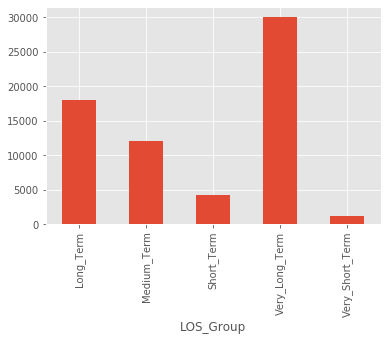

In [31]:
train_data.groupby('LOS_Group').size().plot.bar()
plt.show()

In [32]:
train_data['LOS_Group'].unique()

array(['Very_Short_Term', 'Short_Term', 'Medium_Term', 'Long_Term',
       'Very_Long_Term'], dtype=object)

In [33]:
print(X.shape)
#XnotNorm = np.array(X.copy())
XnotNorm = X.copy()
print('XnotNorm ', XnotNorm.shape)

ynotNorm = y.copy()
print('ynotNorm ', ynotNorm.shape)

(65400, 84)
XnotNorm  (65400, 84)
ynotNorm  (65400,)


In [34]:
x = XnotNorm.values #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
XNorm = pd.DataFrame(x_scaled, columns=XnotNorm.columns)
#print(XNorm)
#print(y)
print('X normalized')

X normalized


In [35]:
# SPLIT into Train & Test

X_train, X_test, y_train, y_test = train_test_split(XNorm, y, test_size=0.2, random_state=7)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)

X_train:  (52320, 84)
X_test:  (13080, 84)
y_train:  (52320,)
y_test:  (13080,)


In [36]:
# Test Models and evaluation metric
seed = 42
scoring = 'accuracy' 

# Spot Check Algorithms
Mymodels = []
#Mymodels.append(('LogReg', LogisticRegression()))
Mymodels.append(('RandomForestClassifier', RandomForestClassifier()))
Mymodels.append(('SGDclassifier', SGDClassifier()))
#Mymodels.append(('KNearestNeighbors', KNeighborsClassifier()))
Mymodels.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
#Mymodels.append(('GaussianNB', GaussianNB()))
#Mymodels.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []
for name, model in Mymodels:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg) 

RandomForestClassifier: 0.733276 (0.007414)
SGDclassifier: 0.504167 (0.008752)
DecisionTreeClassifier: 0.720432 (0.007336)


In [37]:
# Optimize hyper params for one model

model = RandomForestClassifier()

param_grid = [{},]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring)
grid_search.fit(XNorm, y)

print(grid_search.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [38]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

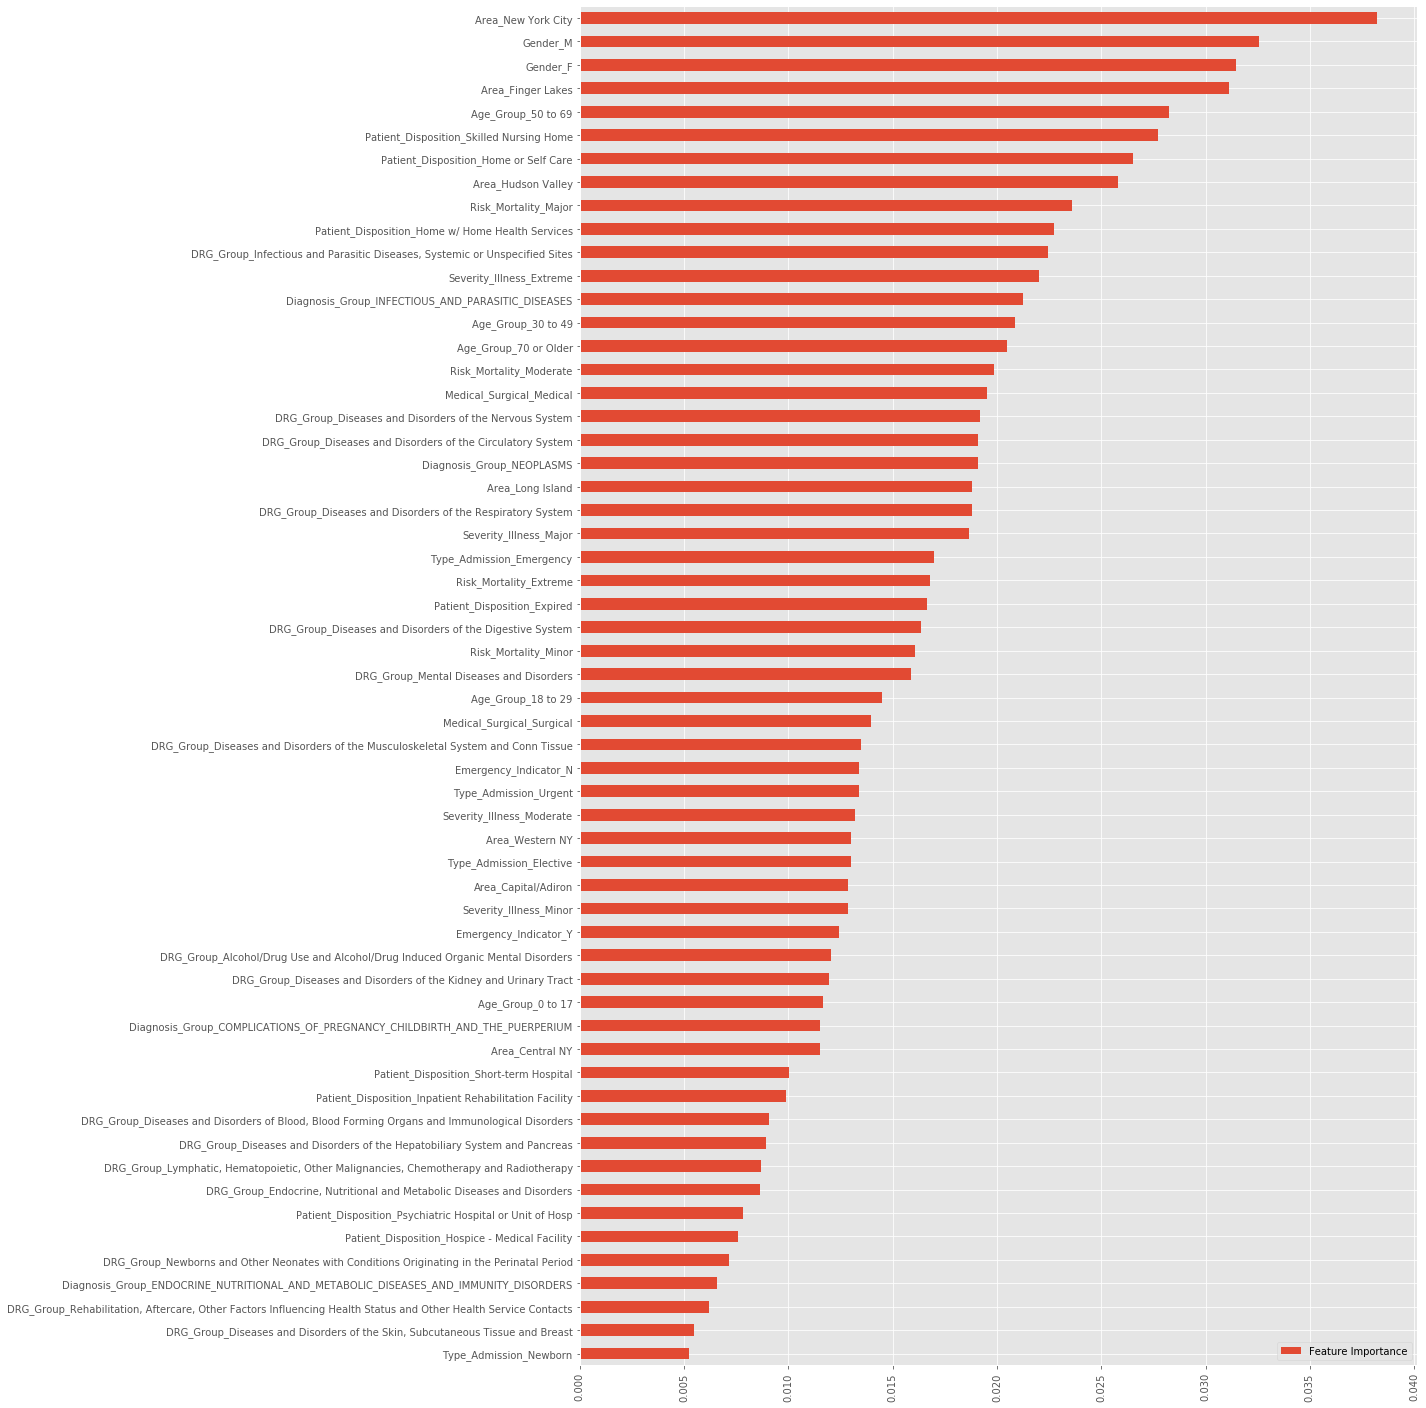

In [39]:
# FEATURE IMPORTANCE - NORMALIZED - last model

trainFinalFI = XNorm
yFinalFI = y

model.fit(trainFinalFI,yFinalFI)

FI_model = pd.DataFrame({"Feature Importance":model.feature_importances_,}, index=trainFinalFI.columns)
FI_model[FI_model["Feature Importance"] > 0.005].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.show()

In [40]:
# List of important features for model
FI_model = pd.DataFrame({"Feature Importance":model.feature_importances_,}, index=trainFinalFI.columns)
FI_model=FI_model.sort_values('Feature Importance', ascending = False)
print(FI_model[FI_model["Feature Importance"] > 0.019])

                                                    Feature Importance
Area_New York City                                            0.038212
Gender_M                                                      0.032586
Gender_F                                                      0.031443
Area_Finger Lakes                                             0.031118
Age_Group_50 to 69                                            0.028264
Patient_Disposition_Skilled Nursing Home                      0.027703
Patient_Disposition_Home or Self Care                         0.026525
Area_Hudson Valley                                            0.025801
Risk_Mortality_Major                                          0.023606
Patient_Disposition_Home w/ Home Health Services              0.022748
DRG_Group_Infectious and Parasitic Diseases, Sy...            0.022468
Severity_Illness_Extreme                                      0.022023
Diagnosis_Group_INFECTIOUS_AND_PARASITIC_DISEASES             0.021252
Age_Gr

In [41]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = 1-np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = 1-np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\surajk067\\AppData\\Roaming\\Python\\Python36\\site-packages\\matplotlib\\pyplot.py'>

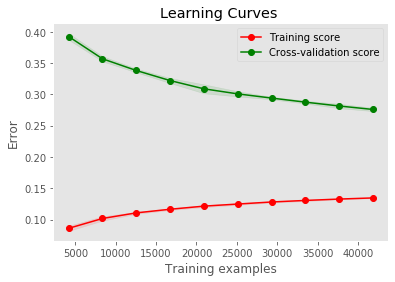

In [42]:
# LEARNING CURVES Train / Validation

title = "Learning Curves "
cv = ShuffleSplit(n_splits=7, test_size=0.2)
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=4)
#plot_learning_curve(model, title, XNorm, y, ylim=(0.01, 0.99), cv=cv, n_jobs=4)

In [43]:
# Split into Train & Test

X_train, X_test, y_train, y_test = train_test_split(XNorm, y, test_size=0.2, random_state=42)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)

X_train:  (52320, 84)
X_test:  (13080, 84)
y_train:  (52320,)
y_test:  (13080,)


In [44]:
# Model FINAL fit and evaluation on test

model.fit(X_train, y_train)
final_predictions = model.predict(X_test)

#final_acc = accuracy(y_test, final_predictions)
# Confusion matrix

conf_mx = confusion_matrix(y_test, final_predictions)
print('conf_mx ready')

conf_mx ready


In [45]:
def plot_confusion_matrix(cm,target_names,title='Confusion Matrix',cmap=None,
                          normalize=False):
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

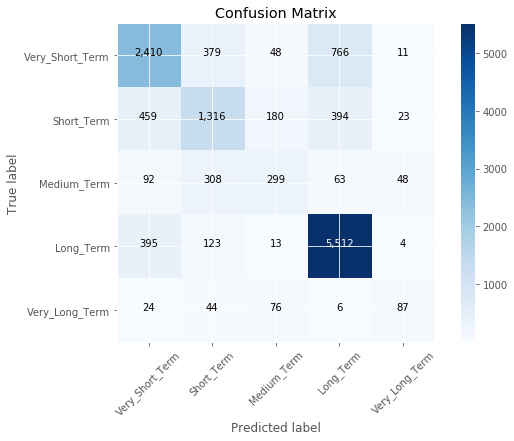

In [46]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['Very_Short_Term', 'Short_Term', 'Medium_Term', 'Long_Term','Very_Long_Term'],
                      title        = "Confusion Matrix")

Class  0


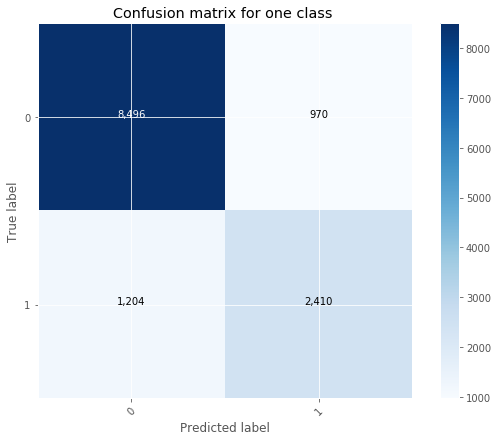

TPz  2410
FNz  1204
FPz  970
TNz  8496
sum  13080
[[8496  970]
 [1204 2410]]
Sum of CM  13080
accuracy  0.8338
recall  0.6669
precision  0.713
F1Score  0.6892
----------------------------------------
Class  1


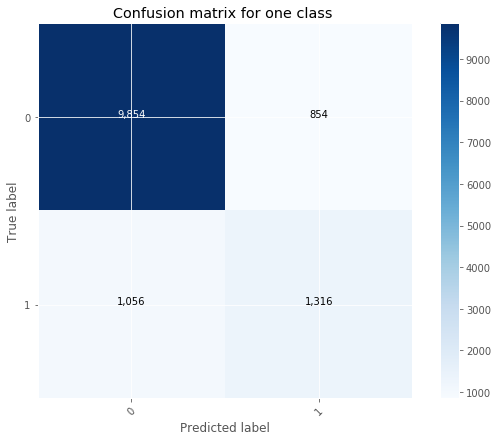

TPz  1316
FNz  1056
FPz  854
TNz  9854
sum  13080
[[9854  854]
 [1056 1316]]
Sum of CM  13080
accuracy  0.854
recall  0.5548
precision  0.6065
F1Score  0.5795
----------------------------------------
Class  2


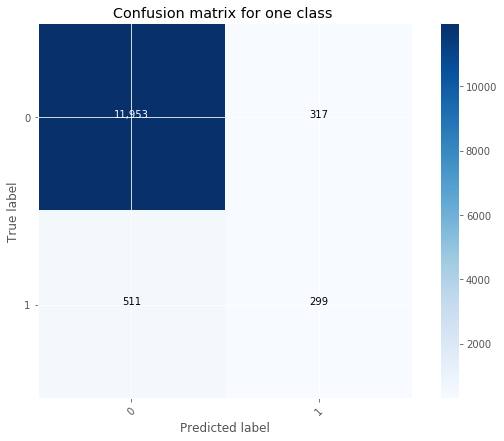

TPz  299
FNz  511
FPz  317
TNz  11953
sum  13080
[[11953   317]
 [  511   299]]
Sum of CM  13080
accuracy  0.9367
recall  0.3691
precision  0.4854
F1Score  0.4194
----------------------------------------
Class  3


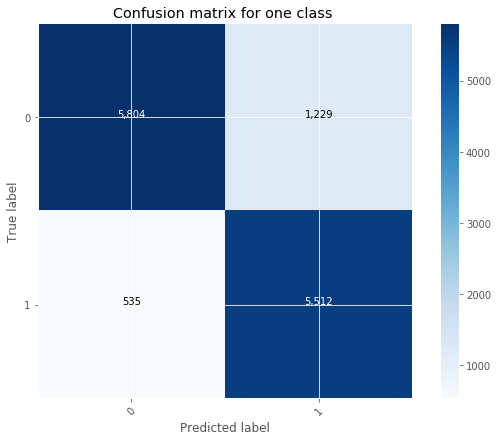

TPz  5512
FNz  535
FPz  1229
TNz  5804
sum  13080
[[5804 1229]
 [ 535 5512]]
Sum of CM  13080
accuracy  0.8651
recall  0.9115
precision  0.8177
F1Score  0.8621
----------------------------------------
Class  4


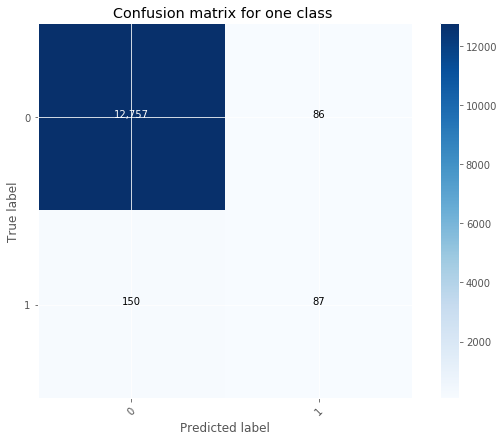

TPz  87
FNz  150
FPz  86
TNz  12757
sum  13080
[[12757    86]
 [  150    87]]
Sum of CM  13080
accuracy  0.982
recall  0.3671
precision  0.5029
F1Score  0.4244
----------------------------------------
TN:  48864
FP:  3456
FN:  3456
TP:  9624
________________________________________


In [47]:
# Confusion matrix and all metrics - for EACH class separately

NumClasses = 5

TP = 0
TN = 0
FP = 0
FN = 0

for z in range(NumClasses):
# One class at a time - calculate confusion matrix
    SumCM = np.sum(conf_mx)
    TPz = conf_mx[z,z]
    FNz = np.sum(conf_mx[z,:], axis=0) -TPz
    FPz = np.sum(conf_mx[:,z], axis=0) -TPz
    TNz = SumCM - (TPz+FNz+FPz)
    #FPz = np.sum(conf_mx[z], axis=-1) 
    #FPz = sum(conf_mx(:, z))-conf_mx(z, z)
    #FNz = sum(conf_mx(x, :), 2)-conf_mx(x, x)
    print('Class ',z)
  

    # Create conf matrix for class z
    cmZ = np.zeros([2, 2], dtype=np.int32)
    cmZ[0,0] = TNz
    cmZ[0,1] = FPz
    cmZ[1,0] = FNz
    cmZ[1,1] = TPz

    plot_confusion_matrix(cmZ, 
                          normalize    = False,
                          target_names = [0,1],
                          title        = "Confusion matrix for one class ")

    accuracy = (TPz+TNz)/(TPz+TNz+FPz+FNz)
    recall = TPz/(TPz+FNz)
    precision = TPz/(TPz+FPz)
    f1score = 2*recall*precision/(recall+precision)
    #roc_auc = auc(FPz, TPz)
    
    print('TPz ',TPz)
    print('FNz ',FNz)
    print('FPz ',FPz)
    print('TNz ',TNz)
    print('sum ', TPz+TNz+FPz+FNz)
    print(cmZ)
    print('Sum of CM ', np.sum(cmZ))
    print ('accuracy ',round(accuracy,4))
    print('recall ', round(recall,4))
    print('precision ', round(precision,4))
    print('F1Score ', round(f1score,4))
    print('-'*40)
    
    TP = TP + TPz
    TN = TN + TNz
    FP = FP + FPz
    FN = FN + FNz
print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)
print('_'*40)

Confusion Matix for ALL Classes


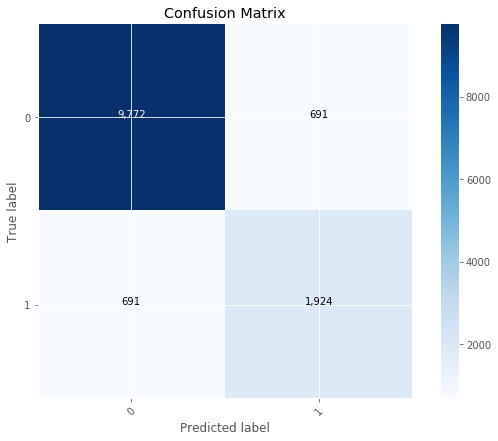

In [48]:
# Confusion Matrix for the WHOLE MODEL - ALL Classes

print('Confusion Matix for ALL Classes')

TP = TP / NumClasses
TN = TN / NumClasses
FP = FP / NumClasses
FN = FN / NumClasses


cm = np.zeros([2, 2], dtype=np.int32)
cm[0,0] = TN
cm[0,1] = FP
cm[1,0] = FN
cm[1,1] = TP

plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = [0,1],
                      title        = "Confusion Matrix")

In [49]:
def multiclass_roc_auc_score(y_test, final_predictions, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(final_predictions)

    return roc_auc_score(y_test, y_pred, average=average)

print('AUC ROC ',multiclass_roc_auc_score(y_test, final_predictions))

AUC ROC  0.7479903287689063
